In [1]:
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load NIAID queries

queries_df = pd.read_csv('./niaid_queries_revisited.csv', sep=',')
queries_df

,combination,search term,result id
0,original query,influenza,PRJNA658522
1,original query,influenza,PRJNA658529
2,original query,influenza,PRJNA658552
3,original query,influenza,PRJNA658564
4,original query,influenza,PRJNA658562
...,...,...,...
3995,c15,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,c15,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,c15,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,c15,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [3]:
# Drop combination column

queries_df = queries_df.drop('combination', axis = 1).copy()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3995,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [4]:
# Drop duplicates

queries_df = queries_df.drop_duplicates()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3917,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3924,hiv,DRYAD_doi.org:10.5061:dryad.wpzgmsbnz
3936,hiv,DRYAD_doi.org:10.5061:dryad.np5hqbzx5
3968,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df


In [5]:
# Load ranked analysis

ranked_df = pd.read_csv('./ranked_analysis_scopes.csv', sep=',')
ranked_df

,scope,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000


In [6]:
# Use shorter names for columns

ranked_df.rename(columns = {'original query': 'original', 'combi 1': 'c1', 'combi 2': 'c2', 'combi 3': 'c3',
                            'combi 4': 'c4', 'combi 5': 'c5', 'combi 6': 'c6', 'combi 7': 'c7', 
                            'combi 8': 'c8', 'combi 9': 'c9', 'combi 10': 'c10', 'combi 11': 'c11', 
                            'combi 12': 'c12', 'combi 13': 'c13', 'combi 14': 'c14', 'combi 15': 'c15'
                           }, inplace = True)
ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000


In [7]:
# Add search term info to ranked analysis data

ranked_df = ranked_df.merge(queries_df[['result id', 'search term']], 
                            how = 'left', on = 'result id').copy()
ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000,t-cell function
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333,t-cell function
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000,sublingual immunotherapy
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667,addison's disease
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000,addison's disease
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000,sublingual immunotherapy


In [8]:
duplicate_results = ranked_df[ranked_df.duplicated(['result id'])]
duplicate_results

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term


In [9]:
combination_order = ['original', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                     'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
                     'c14', 'c15']

In [10]:
def compute_scores(df, combination_order):
    final_df = pd.DataFrame()

    for combi in combination_order:
        df_comb = df[['search term', combi]].copy()
        df_comb_sum = df_comb.groupby('search term').sum().reset_index()
        if final_df.empty:
            final_df = df_comb_sum
        else: 
            final_df = final_df.merge(df_comb_sum, on = 'search term')

    final_df.columns = ['search term'] + combination_order
    return final_df

In [11]:
def perform_wilcoxon_test(data):
    data = data.drop('search term', axis = 1)
    # Get the column names
    columns = data.columns
    
    # Initialize a list to hold the results
    results = []
    
    # Perform the Wilcoxon signed-rank test for each pair of columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            stat, p = wilcoxon(data[col1], data[col2])
            results.append((col1, col2, stat, p))
            
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results, columns=['set 1', 'set 2', 'statistic', 'p-value'])
    return results_df

In [12]:
def compare_scores(scores, columns):
    score_comparisons = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            set1 = columns[i]
            set2 = columns[j]
            if scores[set1] > scores[set2]:
                score_comparisons[(set1, set2)] = set1
            else:
                score_comparisons[(set1, set2)] = set2
    return score_comparisons

In [13]:
def add_winner(row):
    set1, set2 = row['set 1'], row['set 2']
    return winners[(set1, set2)]

In [14]:
def swap_sets(row):
    s1_index = combination_order.index(row['set 1'])
    s2_index = combination_order.index(row['set 2'])
    if s2_index < s1_index:
        return pd.Series([row['set 1'], row['set 2'], row['p-value']])  
    else:
        return pd.Series([row['set 2'], row['set 1'], row['p-value']])

In [15]:
def create_heatmap_with_winners(df, title, filename):
    heatmap_data = df.pivot('set 1', 'set 2', 'p-value')

    # Reorder index and columns
    heatmap_data = heatmap_data.reindex(combination_order, axis = 0)
    heatmap_data = heatmap_data.reindex(combination_order, axis = 1)

    # Combine winner and p-value in the annotation
    formatted_text = np.empty(heatmap_data.shape, dtype = object)
    
    for i in range(len(combination_order)):
        for j in range(len(combination_order)):
            if not np.isnan(heatmap_data.iloc[i, j]):
                formatted_text[i, j] = "{}\n{:.3f}".format(df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['winner'].values[0], df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['p-value'].values[0])
        else:
            formatted_text[i, j] = ""

    # Create heatmap using seaborn
    sns.set(font_scale = 1.4)
    sns.set_style('white')
    plt.figure(figsize = (24, 12))
    sns.heatmap(heatmap_data, cmap='BuPu_r', annot=formatted_text, fmt="", cbar_kws={'label': 'p-values'})
    plt.savefig(f'../alternate_test/results/{filename}.png', dpi = 150, bbox_inches = 'tight')
    plt.show()

# very specific

In [16]:
very_specific_ranked_df = ranked_df.loc[ranked_df['scope'] == 'very specific']
very_specific_ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
418,very specific,GSE115723,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,pinealocyte
419,very specific,GSE142476,0.000000,1.400000,1.400000,1.400000,1.555556,2.800000,1.400000,1.400000,1.400000,1.555556,2.333333,1.400000,1.400000,1.400000,1.400000,1.555556,pinealocyte
420,very specific,GSE147197,0.000000,0.000000,2.222222,3.333333,3.333333,6.666667,0.000000,0.000000,2.500000,2.500000,4.000000,0.000000,0.000000,0.000000,2.222222,2.500000,sublingual immunotherapy
421,very specific,IMMPORT_SDY1026,0.000000,0.000000,0.000000,3.200000,16.000000,16.000000,0.000000,0.000000,3.200000,16.000000,16.000000,0.000000,0.000000,2.285714,4.000000,5.333333,sublingual immunotherapy
422,very specific,IMMPORT_SDY1515_2,0.000000,0.000000,0.000000,0.000000,6.333333,9.500000,0.000000,0.000000,0.000000,3.800000,9.500000,0.000000,0.000000,0.000000,2.375000,3.800000,sublingual immunotherapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900000,0.000000,3.166667,3.166667,2.714286,1.900000,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000,sublingual immunotherapy
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500000,3.666667,2.750000,2.750000,3.666667,5.500000,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667,addison's disease
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300000,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000,addison's disease
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250000,5.250000,2.625000,5.250000,5.250000,10.500000,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000,sublingual immunotherapy


In [18]:
# Calculate scores per search term per combination

very_specific_scores_df = compute_scores(very_specific_ranked_df, combination_order)
very_specific_scores_df

,search term,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,addison's disease,46.199206,46.199206,46.599206,45.584921,45.551587,46.501587,46.199206,46.596825,45.918254,45.551587,46.534921,46.199206,46.596825,46.501587,45.551587,46.534921
1,malaria therapeutics,46.933333,49.047222,49.247222,50.330556,50.205556,50.894444,48.847222,49.247222,49.247222,50.330556,50.844444,48.722222,49.047222,49.247222,50.330556,50.205556
2,naegleria fowleri infection,55.609921,58.565476,58.565476,58.565476,58.565476,58.565476,58.565476,58.565476,58.565476,58.565476,58.511905,55.609921,58.565476,58.565476,58.392857,58.392857
3,pinealocyte,50.630556,52.030556,52.030556,52.030556,52.230556,50.046825,52.030556,52.030556,52.030556,52.230556,51.113492,52.030556,52.030556,52.030556,52.030556,52.230556
4,sublingual immunotherapy,59.171429,59.171429,59.660317,59.280952,54.619444,54.033333,59.157540,59.771429,59.075397,55.144444,54.032540,59.511111,59.777778,58.521825,58.530556,57.582540


In [19]:
# Run Wilcoxon test

very_specific_wilcoxon_df = perform_wilcoxon_test(very_specific_scores_df)
very_specific_wilcoxon_df

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,set 1,set 2,statistic,p-value
0,original,c1,1.0,0.144127
1,original,c2,0.0,0.062500
2,original,c3,2.0,0.187500
3,original,c4,6.0,0.812500
4,original,c5,7.0,1.000000
...,...,...,...,...
115,c12,c14,4.0,0.715001
116,c12,c15,7.0,1.000000
117,c13,c14,5.0,1.000000
118,c13,c15,6.0,0.812500


In [20]:
# Export scores per search term

very_specific_scores_df.to_csv('../alternate_test/results/scores_very_specific.csv', index = False)

In [21]:
# Drop search term column

very_specific_scores_only_df = very_specific_scores_df.drop(columns = ['search term'])
very_specific_scores_only_df

,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,46.199206,46.199206,46.599206,45.584921,45.551587,46.501587,46.199206,46.596825,45.918254,45.551587,46.534921,46.199206,46.596825,46.501587,45.551587,46.534921
1,46.933333,49.047222,49.247222,50.330556,50.205556,50.894444,48.847222,49.247222,49.247222,50.330556,50.844444,48.722222,49.047222,49.247222,50.330556,50.205556
2,55.609921,58.565476,58.565476,58.565476,58.565476,58.565476,58.565476,58.565476,58.565476,58.565476,58.511905,55.609921,58.565476,58.565476,58.392857,58.392857
3,50.630556,52.030556,52.030556,52.030556,52.230556,50.046825,52.030556,52.030556,52.030556,52.230556,51.113492,52.030556,52.030556,52.030556,52.030556,52.230556
4,59.171429,59.171429,59.660317,59.280952,54.619444,54.033333,59.157540,59.771429,59.075397,55.144444,54.032540,59.511111,59.777778,58.521825,58.530556,57.582540


In [22]:
# Compute total scores per combination

very_specific_total_scores_df = very_specific_scores_only_df.sum()
very_specific_total_scores_df

original    258.544444
c1          265.013889
c2          266.102778
c3          265.792460
c4          261.172619
c5          260.041667
c6          264.800000
c7          266.211508
c8          264.836905
c9          261.822619
c10         261.037302
c11         262.073016
c12         266.017857
c13         264.866667
c14         264.836111
c15         264.946429
dtype: float64

In [23]:
# Determine winners by comparing combination scores

winners = compare_scores(very_specific_total_scores_df, combination_order)
winners

{('original', 'c1'): 'c1',
 ('original', 'c2'): 'c2',
 ('original', 'c3'): 'c3',
 ('original', 'c4'): 'c4',
 ('original', 'c5'): 'c5',
 ('original', 'c6'): 'c6',
 ('original', 'c7'): 'c7',
 ('original', 'c8'): 'c8',
 ('original', 'c9'): 'c9',
 ('original', 'c10'): 'c10',
 ('original', 'c11'): 'c11',
 ('original', 'c12'): 'c12',
 ('original', 'c13'): 'c13',
 ('original', 'c14'): 'c14',
 ('original', 'c15'): 'c15',
 ('c1', 'c2'): 'c2',
 ('c1', 'c3'): 'c3',
 ('c1', 'c4'): 'c1',
 ('c1', 'c5'): 'c1',
 ('c1', 'c6'): 'c1',
 ('c1', 'c7'): 'c7',
 ('c1', 'c8'): 'c1',
 ('c1', 'c9'): 'c1',
 ('c1', 'c10'): 'c1',
 ('c1', 'c11'): 'c1',
 ('c1', 'c12'): 'c12',
 ('c1', 'c13'): 'c1',
 ('c1', 'c14'): 'c1',
 ('c1', 'c15'): 'c1',
 ('c2', 'c3'): 'c2',
 ('c2', 'c4'): 'c2',
 ('c2', 'c5'): 'c2',
 ('c2', 'c6'): 'c2',
 ('c2', 'c7'): 'c7',
 ('c2', 'c8'): 'c2',
 ('c2', 'c9'): 'c2',
 ('c2', 'c10'): 'c2',
 ('c2', 'c11'): 'c2',
 ('c2', 'c12'): 'c2',
 ('c2', 'c13'): 'c2',
 ('c2', 'c14'): 'c2',
 ('c2', 'c15'): 'c2',
 ('

In [24]:
# Add winners to Wilcoxon test results

very_specific_wilcoxon_df['winner'] = very_specific_wilcoxon_df.apply(add_winner, axis = 1)
very_specific_wilcoxon_df

,set 1,set 2,statistic,p-value,winner
0,original,c1,1.0,0.144127,c1
1,original,c2,0.0,0.062500,c2
2,original,c3,2.0,0.187500,c3
3,original,c4,6.0,0.812500,c4
4,original,c5,7.0,1.000000,c5
...,...,...,...,...,...
115,c12,c14,4.0,0.715001,c12
116,c12,c15,7.0,1.000000,c12
117,c13,c14,5.0,1.000000,c13
118,c13,c15,6.0,0.812500,c15


In [25]:
very_specific_wilcoxon_df['winner'].value_counts()

c7     15
c2     14
c12    13
c3     12
c1     11
c15    10
c13     9
c8      8
c14     7
c6      6
c11     5
c9      4
c4      3
c10     2
c5      1
Name: winner, dtype: int64

In [26]:
very_specific_wilcoxon_df[very_specific_wilcoxon_df['p-value'] <= 0.05]

,set 1,set 2,statistic,p-value,winner


In [27]:
# Export Wilcoxon test results

very_specific_wilcoxon_df.to_csv('../alternate_test/results/wilcoxon_with_winners_very_specific.csv', index = False)

In [28]:
# Rearrange rows so that heatmap cells are rendered below the main diagonal

very_specific_wilcoxon_df[['set 1', 'set 2', 'p-value']] = very_specific_wilcoxon_df.apply(swap_sets, axis = 1)

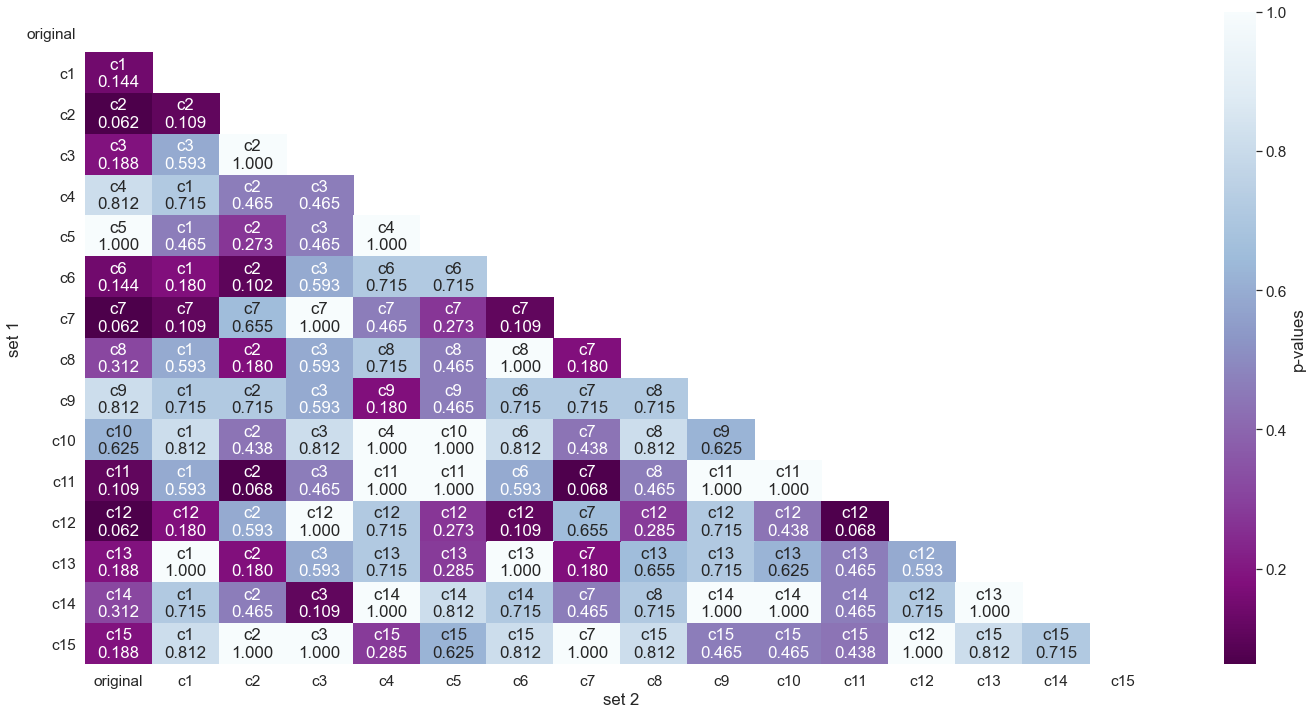

In [30]:
# Generate heatmap of p-values with winners

create_heatmap_with_winners(very_specific_wilcoxon_df, 'Heatmap of p-values | Wilcoxon test', 
                            'wilcoxon_heatmap_with_winners_very_specific')